In [69]:
import numpy as np
import os
import pandas as pd
import yaml

from pathlib import Path

import matplotlib.pyplot as plt

from assistive_arm.utils.optimum_length_utils import smooth_dataframe, interpolate_dataframe
from assistive_arm.utils.data_preprocessing import read_headers

In [70]:
log_dir = Path("../subject_logs/")
subject_path = log_dir / "subject_Xabi"
day_path = subject_path / "December_18"

motor_data_paths = [file for file in sorted(day_path.iterdir()) if file.suffix == ".csv"]
motor_data_paths

[PosixPath('../subject_logs/subject_Xabi/December_18/assist_01.csv'),
 PosixPath('../subject_logs/subject_Xabi/December_18/assist_02.csv'),
 PosixPath('../subject_logs/subject_Xabi/December_18/assist_03.csv'),
 PosixPath('../subject_logs/subject_Xabi/December_18/assist_04.csv'),
 PosixPath('../subject_logs/subject_Xabi/December_18/assist_05.csv'),
 PosixPath('../subject_logs/subject_Xabi/December_18/assist_06.csv'),
 PosixPath('../subject_logs/subject_Xabi/December_18/assist_07.csv'),
 PosixPath('../subject_logs/subject_Xabi/December_18/assist_08.csv'),
 PosixPath('../subject_logs/subject_Xabi/December_18/assist_09.csv'),
 PosixPath('../subject_logs/subject_Xabi/December_18/assist_10.csv'),
 PosixPath('../subject_logs/subject_Xabi/December_18/assist_11.csv'),
 PosixPath('../subject_logs/subject_Xabi/December_18/assist_12.csv')]

In [71]:
log_path = motor_data_paths[6]
# log_name = "1_fixed_force_time_27_force_62.csv"

yaml_path = day_path / "device_height_calibration.yaml"

In [72]:
headers = read_headers(log_path, 2, ",")
time = headers[0][1]
force = headers[1][1]
print(os.getcwd())
task_df = pd.read_csv(log_path, skiprows=2, index_col='time')
profile = pd.read_csv(f"../torque_profiles/spline_profiles/peak_time_{time}_peak_force_{force}.csv")

# open yaml file
with open(yaml_path, 'r') as f:
    calibration_file = yaml.load(f, Loader=yaml.FullLoader)

/Users/xabieririzar/uni-projects/Harvard/assistive-arm/notebooks


Text(0.5, 0, 'time')

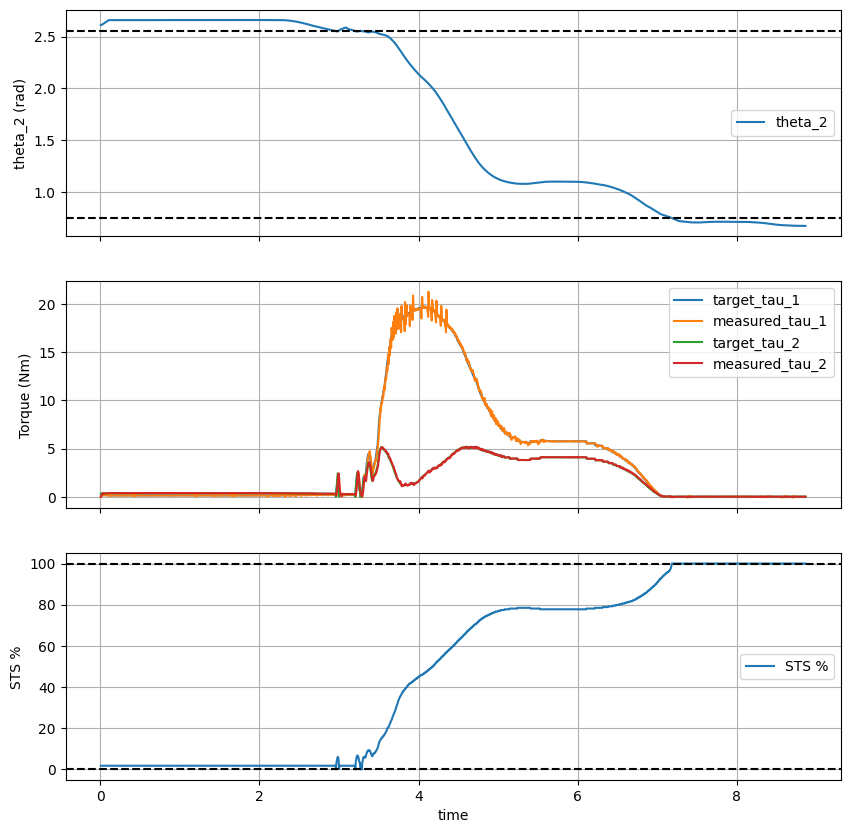

In [73]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10, 10))
ax[0].plot(task_df.index, task_df["theta_2"], label="theta_2")
# ax[0].plot(task_df.index, calibration_file["theta_2_values"], label="theta_2 at calibration")
ax[0].axhline(y=calibration_file["new_range"]["min"], linestyle="--", color="black")
ax[0].axhline(y=calibration_file["new_range"]["max"], linestyle="--", color="black")
ax[0].grid()
ax[0].legend()
ax[0].set_ylabel("theta_2 (rad)")


ax[1].plot(task_df.index, task_df["target_tau_1"], label="target_tau_1")
ax[1].plot(task_df.index, task_df["measured_tau_1"], label="measured_tau_1")
ax[1].plot(task_df.index, task_df["target_tau_2"], label="target_tau_2")
ax[1].plot(task_df.index, task_df["measured_tau_2"], label="measured_tau_2")
ax[1].grid()
ax[1].legend()
ax[1].set_ylabel("Torque (Nm)")

ax[2].plot(task_df.index, task_df["Percentage"], label="STS %")
ax[2].axhline(y=100, linestyle="--", color="black")
ax[2].axhline(y=0, linestyle="--", color="black")
ax[2].grid()
ax[2].legend()
ax[2].set_ylabel("STS %")
ax[2].set_xlabel('time')

Text(0, 0.5, 'torque (Nm)')

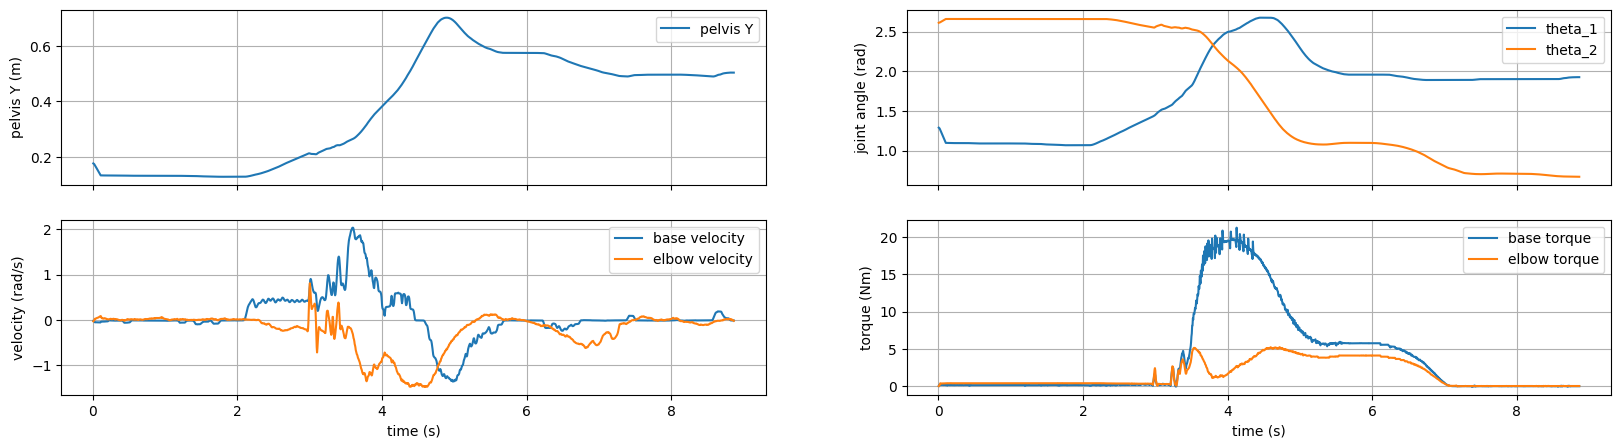

In [74]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(20, 5))

axs[0, 0].plot(task_df.index, -task_df.EE_X, label="pelvis Y")
axs[0, 0].grid()
axs[0, 0].legend()
axs[0, 0].set_ylabel("pelvis Y (m)")

axs[0, 1].plot(task_df.index, task_df.theta_1, label="theta_1")
axs[0, 1].plot(task_df.index, task_df.theta_2, label="theta_2")
axs[0, 1].grid()
axs[0, 1].legend()
axs[0, 1].set_ylabel("joint angle (rad)")


axs[1, 0].plot(task_df.index, task_df.velocity_1, label="base velocity")
axs[1, 0].plot(task_df.index, task_df.velocity_2, label="elbow velocity")
axs[1, 0].grid()
axs[1, 0].legend()
axs[1, 0].set_xlabel('time (s)')
axs[1, 0].set_ylabel('velocity (rad/s)')

axs[1, 1].plot(task_df.index, task_df.measured_tau_1, label="base torque")
axs[1, 1].plot(task_df.index, task_df.measured_tau_2, label="elbow torque")
axs[1, 1].grid()
axs[1, 1].legend()
axs[1, 1].set_xlabel('time (s)')
axs[1, 1].set_ylabel('torque (Nm)')